# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Фиксация сидов позволяет обеспечить воспроизводимость результатов, например, при случайном выборе или при разбиении данных.


# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
df_train.sample(10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

In [4]:
df_test.head()

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [5]:
df_test.tail()

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

In [6]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]
# пропуски имеются в столбцах: mileage, engine, max_power, torque, seats

mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64

In [7]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]
# в тестовой части пропуски в тех же столбцах

mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64

In [8]:
df_train.duplicated().sum()
# В трейн сете имеются дубликаты

985

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [9]:
import re

def parse_torque(value):
  if not isinstance(value, str):
    return None

  value = value.lower().strip()

  torque_match = re.search(r'(\d+(\.\d+)?)', value)
  unit_match = re.search(r'(nm|kgm)', value)

  if torque_match:
      torque = float(torque_match.group(1))

      if unit_match:
          unit = unit_match.group(1)
          if unit == 'kgm':
              torque *= 9.80665  # тут преобразуем kgm в Nm
      return torque

  return None

def parse_num_value(value):

  if not isinstance(value, str):
    return None

  num = re.search(r'(\d+(\.\d+)?)', value.lower().strip())

  if num:
    return num.group(1)

  return None

median_columns = ['mileage', 'engine', 'max_power', 'torque', 'seats']

# спарсим нужные нам признаки
df_train['mileage'] = df_train['mileage'].apply(parse_num_value)
df_train['engine'] = df_train['engine'].apply(parse_num_value)
df_train['max_power'] = df_train['max_power'].apply(parse_num_value)
df_train['torque'] = df_train['torque'].apply(parse_torque)

df_test['mileage'] = df_test['mileage'].apply(parse_num_value)
df_test['engine'] = df_test['engine'].apply(parse_num_value)
df_test['max_power'] = df_test['max_power'].apply(parse_num_value)
df_test['torque'] = df_test['torque'].apply(parse_torque)

# выбросим из трейн сета все значения с пропусками (дубликаты пока оставляем по заданию)
df_train_cleaned = df_train.dropna(subset=median_columns)

# переведём значения признаков в числовые
df_train_cleaned['mileage'] = df_train_cleaned['mileage'].astype(float)
df_train_cleaned['engine'] = df_train_cleaned['engine'].astype(float)
df_train_cleaned['max_power'] = df_train_cleaned['max_power'].astype(float)
df_train_cleaned['torque'] = df_train_cleaned['torque'].astype(float)

# посчитаем медианы на очищенном от пропусков трейн сете и заполним ими отсутсвующие значения в исходных датасетах
for column in median_columns:
    median = df_train_cleaned[column].median()
    print(median)
    df_train[column].fillna(median, inplace=True)
    df_test[column].fillna(median, inplace=True)

19.3
1248.0
82.0
170.0
5.0


<ipython-input-9-79d09055edf8>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_cleaned['mileage'] = df_train_cleaned['mileage'].astype(float)
<ipython-input-9-79d09055edf8>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_cleaned['engine'] = df_train_cleaned['engine'].astype(float)
<ipython-input-9-79d09055edf8>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [ ]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner mileage engine max_power      torque  \
0  Individual       Manual   First Owner    23.4   1248        74  190.000000   
1  Individual       Manual  Second Owner   21.14   1498    103.52  250.000000   
2  Individual       Manual   First Owner    23.0   1396        90  219.668960   
3  Individual       Manual   First Owner    16.1   1298      88.2  112.776475   
4  Individual       Manual   First Owner   20.14   1197     81.86  113.750000   

   seats  
0    5.0  
1    5.0  
2    5.0  
3    5.0  
4    5.0

In [11]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Series([], dtype: int64)

In [12]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Series([], dtype: int64)

**Построение отчёта с помощью библиотеки ydata-profiling**

In [13]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 76.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=12f972dac220299ef7ee830307d663534ef29293d48247ef9ba33875849c1041
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [14]:
from ydata_profiling import ProfileReport

df = pd.DataFrame(df_train, columns=df_test.columns)

profile = ProfileReport(df, title="Profiling Report")

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [15]:
duplicates_in_train = df_train[df_train.duplicated(subset=df_train.columns.difference(['selling_price']))]
print("Количество дубликатов в тренировочном датасете:", len(duplicates_in_train))

duplicates_in_test = df_test[df_test.duplicated(subset=df_test.columns.difference(['selling_price']))]
print("Количество дубликатов в тестовом датасете:", len(duplicates_in_test))

Количество дубликатов в тренировочном датасете: 1159
Количество дубликатов в тестовом датасете: 69


In [16]:
# удалим дубликаты для df_train и # df_test
df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep='first', inplace=True)
df_train.reset_index(drop=True, inplace=True)

# df_test.drop_duplicates(subset=df_test.columns.difference(['selling_price']), keep='first', inplace=True)
# df_test.reset_index(drop=True, inplace=True)

In [17]:
df_train.shape

(5840, 13)

In [18]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [19]:
# единицы измерения уже были убраны в задании 1, можно убедиться в этом:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner mileage engine max_power      torque  \
0  Individual       Manual   First Owner    23.4   1248        74  190.000000   
1  Individual       Manual  Second Owner   21.14   1498    103.52  250.000000   
2  Individual       Manual   First Owner    23.0   1396        90  219.668960   
3  Individual       Manual   First Owner    16.1   1298      88.2  112.776475   
4  Individual       Manual   First Owner   20.14   1197     81.86  113.750000   

   seats  
0    5.0  
1    5.0  
2    5.0  
3    5.0  
4    5.0

In [20]:
df_test.head()

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner mileage engine max_power  \
0  Diesel  Individual       Manual   First Owner    14.0   2498       112   
1  Diesel  Individual       Manual   First Owner    21.5   1497     108.5   
2  Petrol  Individual    Automatic   First Owner    12.9   1799       130   
3  Diesel  Individual       Manual   First Owner    25.1   1498      98.6   
4  Petrol  Individual       Manual  Second Owner    16.5   1172        65   

   torque  seats  
0   260.0    7.0  
1   260.0    5.0  
2   172.0    5.0  
3   200.0    5.0  
4    96.0    5.0

In [21]:
df_test[df_test['mileage'].isna()]

Empty DataFrame
Columns: [name, year, selling_price, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, torque, seats]
Index: []

In [22]:
# переведём значения признаков в числовые
df_test['mileage'] = df_test['mileage'].astype(float)
df_test['engine'] = df_test['engine'].astype(float)
df_test['max_power'] = df_test['max_power'].astype(float)

df_train['mileage'] = df_train['mileage'].astype(float)
df_train['engine'] = df_train['engine'].astype(float)
df_train['max_power'] = df_train['max_power'].astype(float)

# удалим столбец torque по заданию
df_train.drop(columns=['torque'], axis=1, inplace=True)
df_test.drop(columns=['torque'], axis=1, inplace=True)

In [23]:
print(df_train.dtypes)
print(df_test.dtypes)

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [24]:
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)

df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [25]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.428611  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.986026   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.910782     5.426712  
std      31.639585     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

In [26]:
df_test.describe()

year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.337480  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.951751   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.550000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.300000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.260000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.844330     5.403000  
std      34.892709     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

In [27]:
df_train.describe(include=['O'])

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [28]:
df_test.describe(include=['O'])

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [29]:
df_train.shape

(5840, 12)

In [30]:
# здесь должно быть 12 столбцов, так как по заданию мы удалили столбец torque (если его очистить и не удалять, то будет 13)
assert df_train.shape == (5840, 13)

AssertionError: 

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

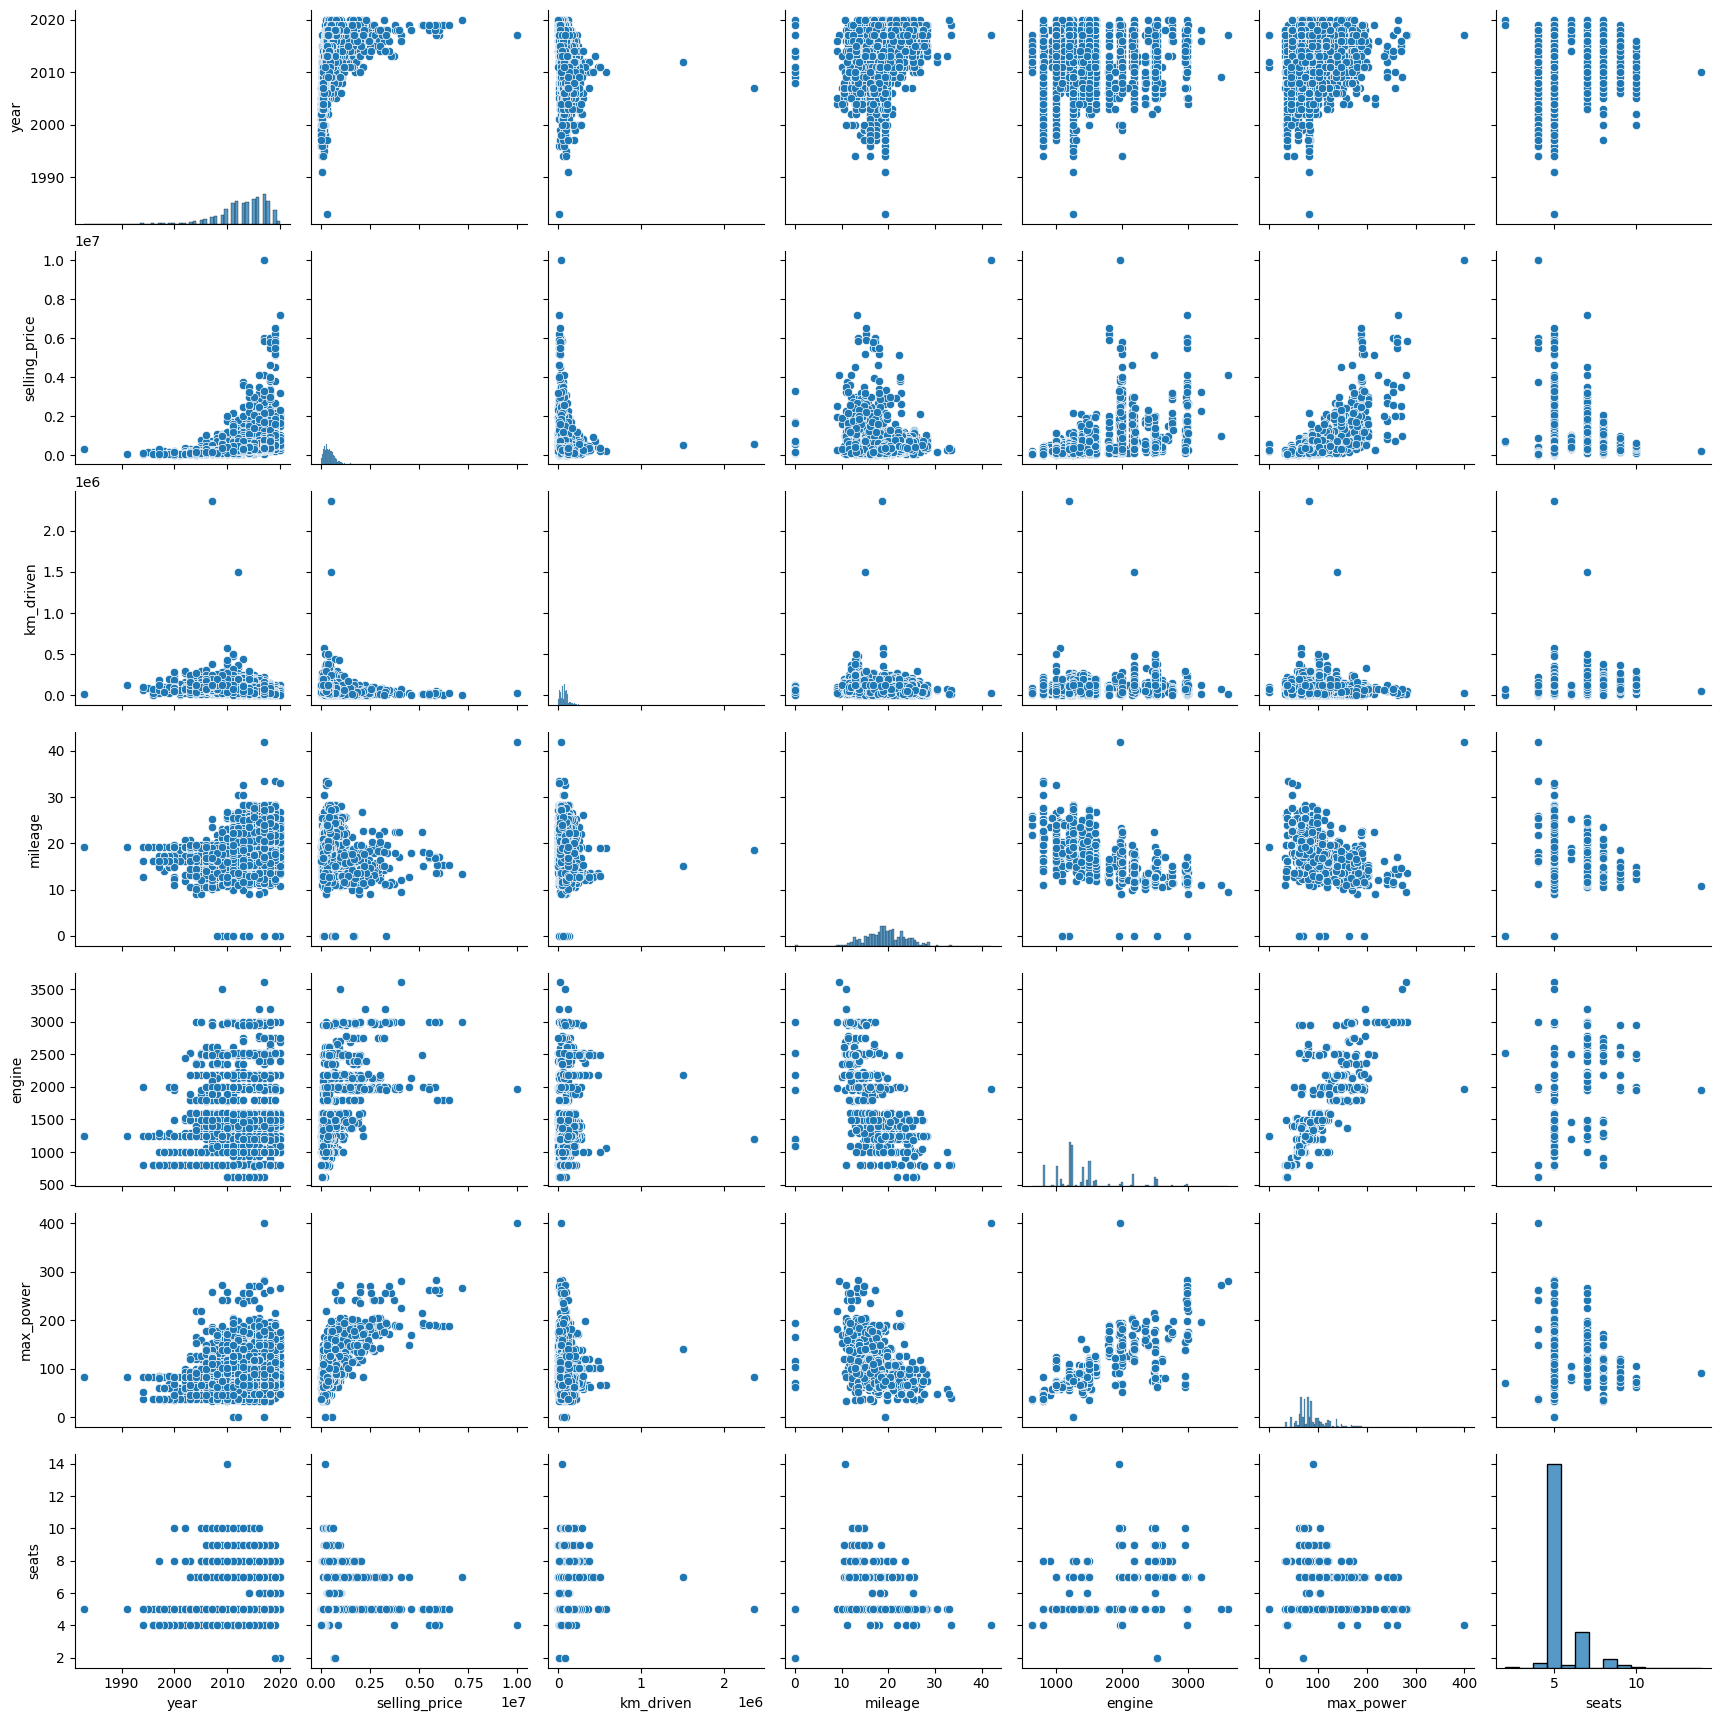

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_train.select_dtypes(include=['float', 'int']))
plt.show()

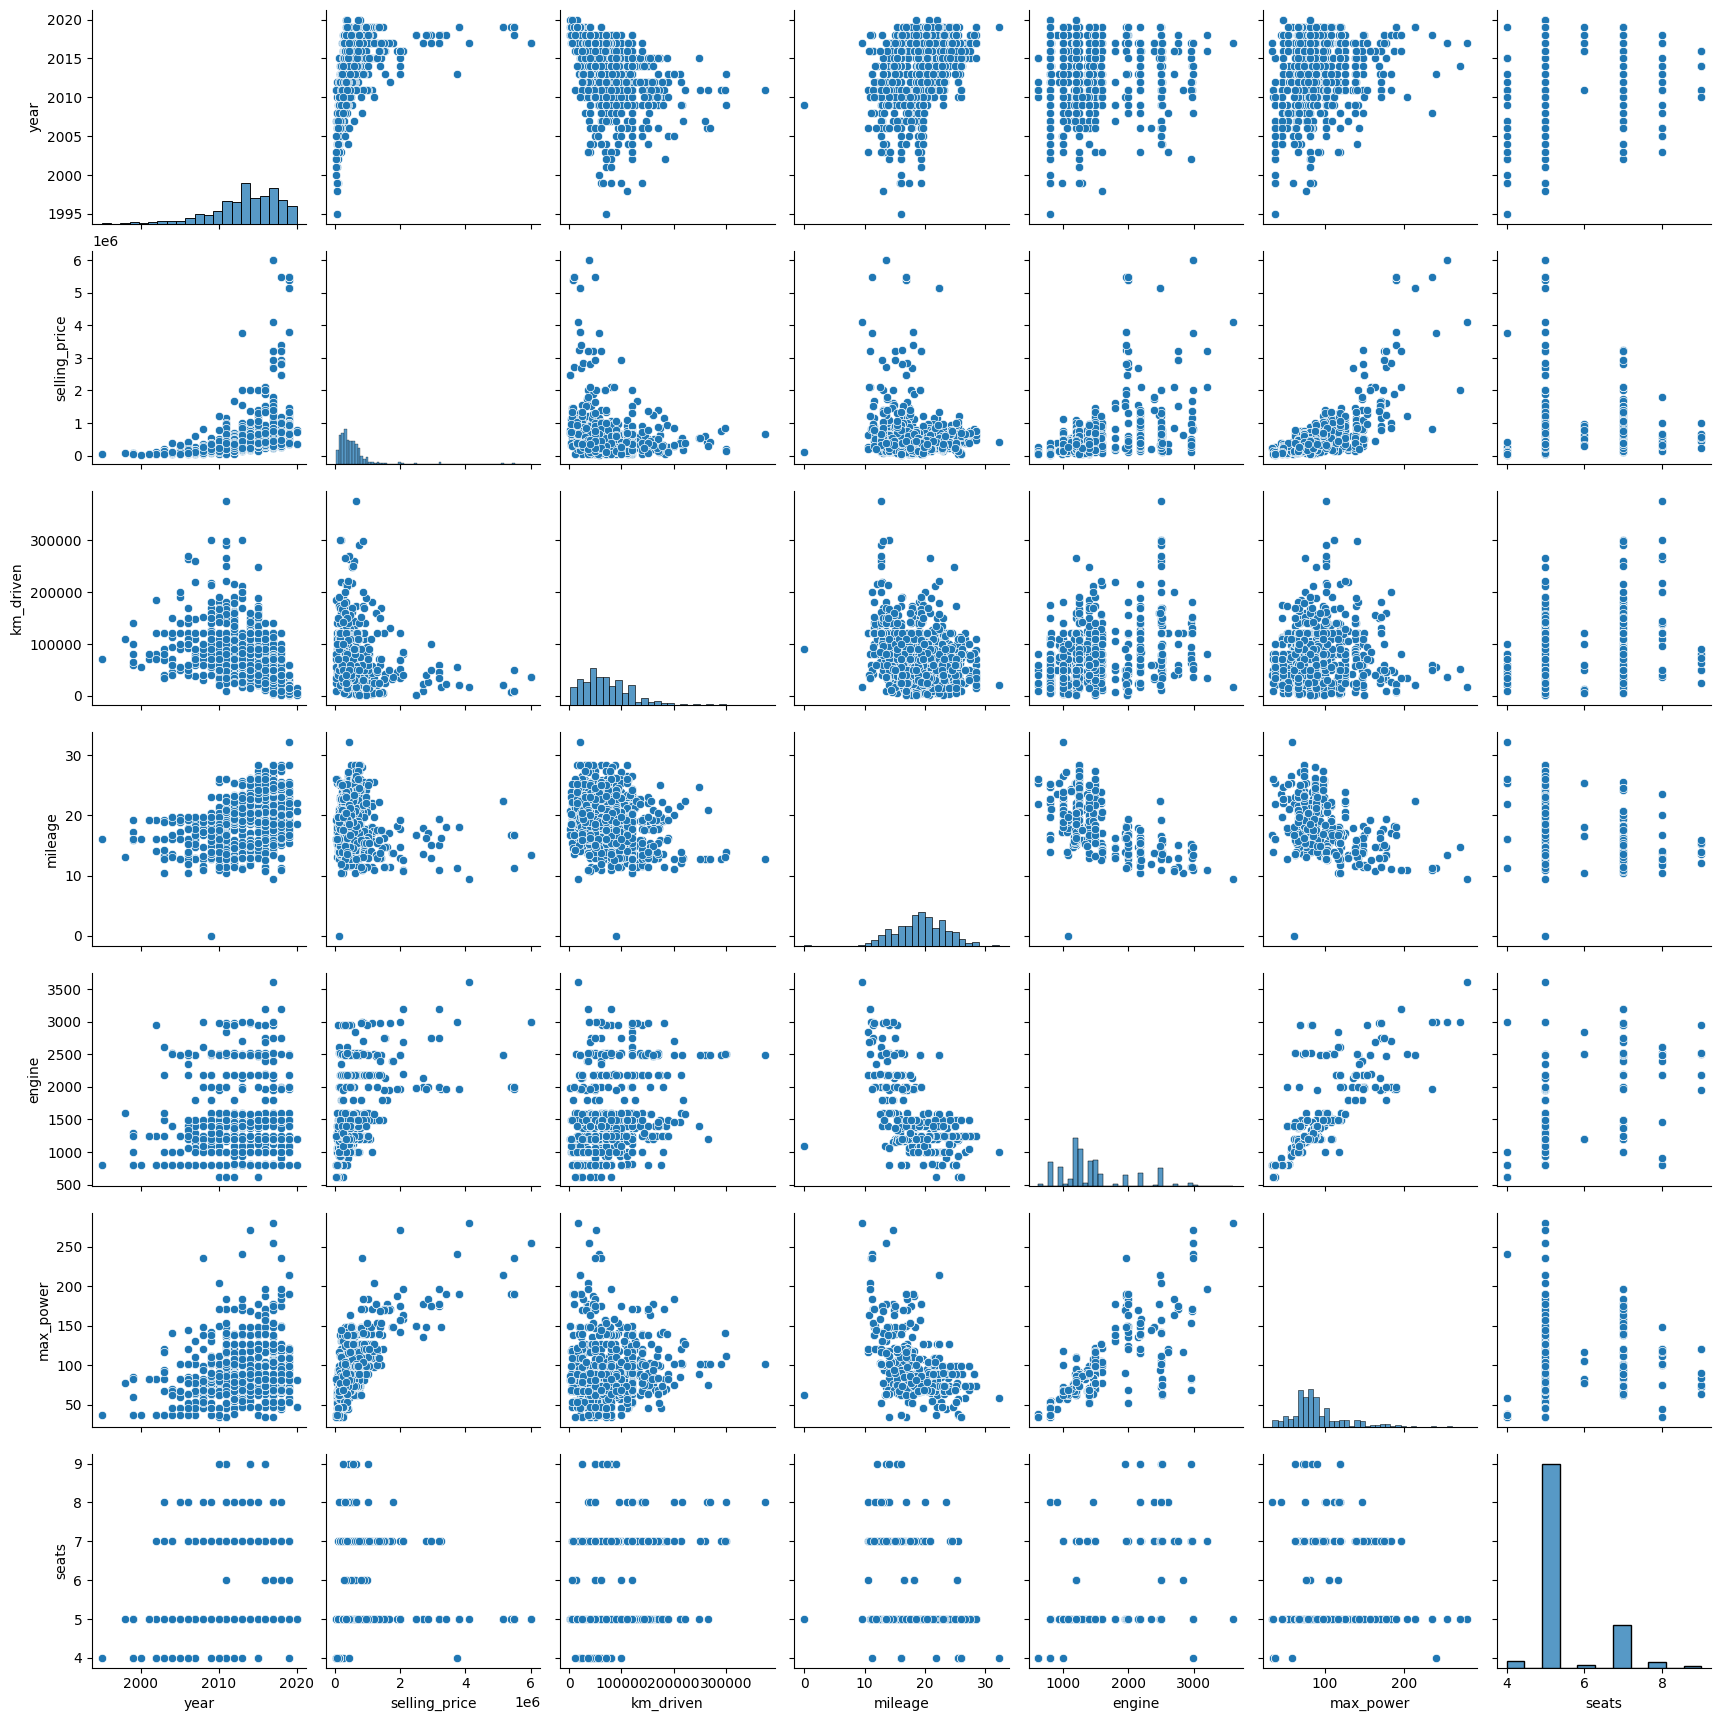

In [32]:
sns.pairplot(df_test.select_dtypes(include=['float', 'int']))
plt.show()

1. На графике можно предположить, что некоторые признаки, такие как мощность двигателя (max_power) и пробег (mileage), могут иметь связь с целевой переменной

2. Признаки двигатель (engine) и мощность (max_power) имеют корреляцию.

Распределения на тренировочной и тестовой выборках выглядят похожими, что означает, что данные выборок совместимы.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


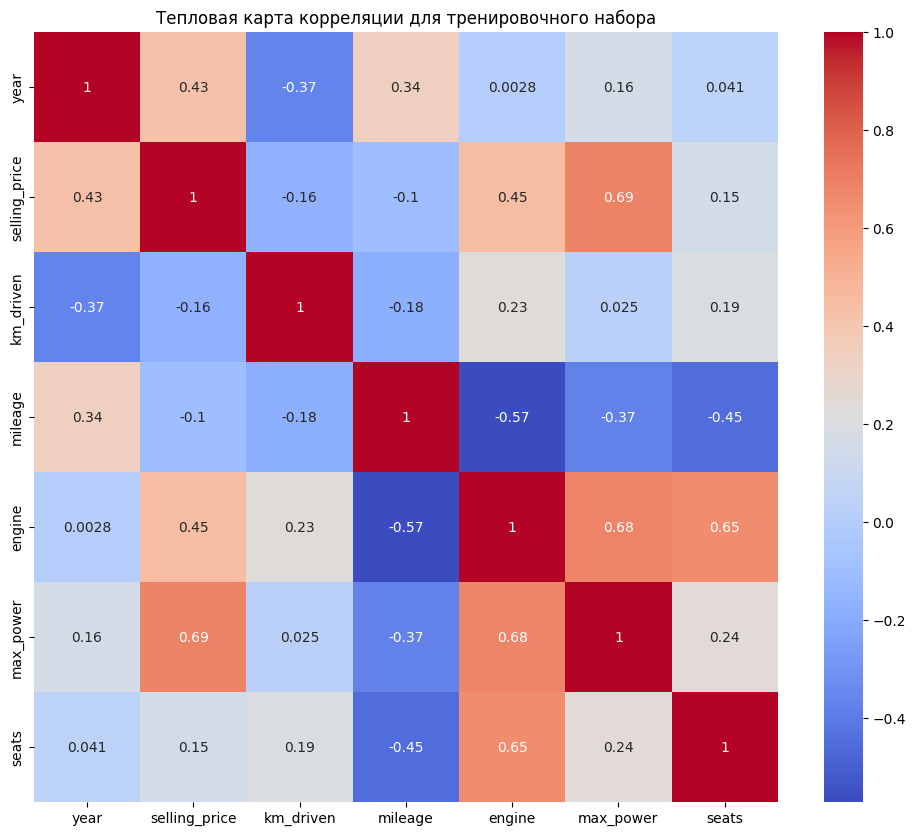

In [33]:
numeric_cols = df_train.select_dtypes(include=['number'])
correlation = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляции для тренировочного набора')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

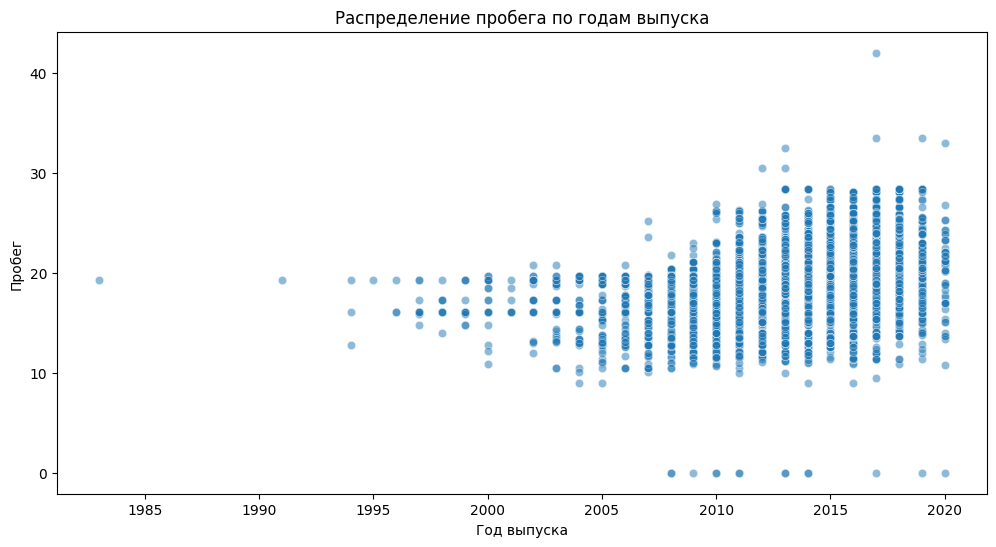

In [34]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_train, x='year', y='mileage', alpha=0.5)
plt.title('Распределение пробега по годам выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Пробег')
plt.show()

1. Наименьшая корреляция у признаков `engine` и `year` 0.0028
2. `max_power` и `selling_price` имеют корреляцию 0.69. Также хорошая корреляция между `engine` и `max_power` - 0.68 и `engine` и `seats` - 0.65
3. Опираясь на данные, нельзя утверждать, что чем меньше год выпуска, тем больше пробег автомобиля. Корреляция между годом выпуска и пробегом составляет 0.34, что свидетельствует о слабой положительной связи, поэтому утверждение скорее всего неверно.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

In [ ]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [35]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

categorical_features = ['name', 'fuel', 'seller_type', 'transmission', 'owner']

df_train_numeric = df_train_copy.drop(columns=categorical_features, axis=1)
df_test_numeric = df_test_copy.drop(columns=categorical_features, axis=1)

df_train_numeric.head()

year  selling_price  km_driven  mileage  engine  max_power  seats
0  2014         450000     145500    23.40    1248      74.00      5
1  2014         370000     120000    21.14    1498     103.52      5
2  2010         225000     127000    23.00    1396      90.00      5
3  2007         130000     120000    16.10    1298      88.20      5
4  2017         440000      45000    20.14    1197      81.86      5

In [36]:
df_test_numeric.head()

year  selling_price  km_driven  mileage  engine  max_power  seats
0  2010         229999     168000     14.0    2498      112.0      7
1  2017         665000      25000     21.5    1497      108.5      5
2  2007         175000     218463     12.9    1799      130.0      5
3  2015         635000     173000     25.1    1498       98.6      5
4  2011         130000      70000     16.5    1172       65.0      5

In [37]:
y_train = df_train_numeric['selling_price']
X_train = df_train_numeric.drop(columns=['selling_price'])

In [38]:
assert X_train.shape == (5840, 6)

In [39]:
y_test = df_test_numeric['selling_price']
X_test = df_test_numeric.drop(columns=['selling_price'])

In [ ]:
X_test.shape

(1000, 6)

In [40]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_y_train_pred = lr.predict(X_train)
lr_y_test_pred = lr.predict(X_test)

r2_train = r2_score(y_train, lr_y_train_pred)
r2_test = r2_score(y_test, lr_y_test_pred)
mse_train = MSE(y_train, lr_y_train_pred)
mse_test = MSE(y_test, lr_y_test_pred)

print(f"R^2 на тренировочных данных: {r2_train:.4f}")
print(f"MSE на тренировочных данных: {mse_train:.2f}")
print(f"R^2 на тестовых данных: {r2_test:.4f}")
print(f"MSE на тестовых данных: {mse_test:.2f}")

R^2 на тренировочных данных: 0.5923
MSE на тренировочных данных: 116873067751.52
R^2 на тестовых данных: 0.5941
MSE на тестовых данных: 233297548204.61


Метрика r2 показывает довольно средний результат. Это означает, что модель плохо обучена, либо не хватает данных, возможно не хватает категориальных признаков для того, чтобы улучшить результат. При этом эта метрика показывает схожий результат как на тестовом наборе, так и на тренировочном наборе.


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns, index=X_test.index)

In [43]:
lr2 = LinearRegression()
lr2.fit(X_train_scaled, y_train)

lr2_y_train_pred = lr2.predict(X_train_scaled)
lr2_y_test_pred = lr2.predict(X_test_scaled)

r2_train_2 = r2_score(y_train, lr2_y_train_pred)
r2_test_2 = r2_score(y_test, lr2_y_test_pred)
mse_train_2 = MSE(y_train, lr2_y_train_pred)
mse_test_2 = MSE(y_test, lr2_y_test_pred)

print(f"R^2 на тренировочных данных: {r2_train_2:.4f}")
print(f"MSE на тренировочных данных: {mse_train_2:.2f}")
print(f"R^2 на тестовых данных: {r2_test_2:.4f}")
print(f"MSE на тестовых данных: {mse_test_2:.2f}")

R^2 на тренировочных данных: 0.5923
MSE на тренировочных данных: 116873067751.52
R^2 на тестовых данных: 0.5941
MSE на тестовых данных: 233297548204.60


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [44]:
lr2.fit(X_train_scaled, y_train)

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr2.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

feature_importance

Feature    Coefficient
4  max_power  322779.703236
0       year  152843.262358
3     engine   61176.857150
1  km_driven  -44148.047511
2    mileage   28781.086595
5      seats  -23220.570226

Наиболее важным признаком является `max_power`

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [45]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
mse_train_lasso = MSE(y_train, y_train_pred_lasso)
mse_test_lasso = MSE(y_test, y_test_pred_lasso)

print(f"Lasso R^2 на тренировочных данных: {r2_train_lasso:.4f}")
print(f"Lasso MSE на тренировочных данных: {mse_train_lasso:.2f}")
print(f"Lasso R^2 на тестовых данных: {r2_test_lasso:.4f}")
print(f"Lasso MSE на тестовых данных: {mse_test_lasso:.2f}")

Lasso R^2 на тренировочных данных: 0.5923
Lasso MSE на тренировочных данных: 116873067761.64
Lasso R^2 на тестовых данных: 0.5941
Lasso MSE на тестовых данных: 233298219170.76


На тестовом наборе данных мы получили R2 равный 0.5941. Относительно модели линейной регрессии результат не поменялся.

In [46]:
pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_model.coef_
})

Feature    Coefficient
0       year  152843.083853
1  km_driven  -44146.918538
2    mileage   28779.204085
3     engine   61172.025780
4  max_power  322780.586197
5      seats  -23217.693273

Коэффициенты не занулились, а значит, все признаки обладают значимой корреляцией

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [47]:
from sklearn.model_selection import GridSearchCV

lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_params, cv=10, scoring='r2')
lasso_grid.fit(X_train_scaled, y_train)

train_lasso_grid_pred = lasso_grid.predict(X_train_scaled)
test_lasso_grid_pred = lasso_grid.predict(X_test_scaled)

print(f"Лучший параметр alpha для Lasso: {lasso_grid.best_params_['alpha']}\n")
print(f"Лучший R^2 для Lasso: {lasso_grid.best_score_:.4f}\n")

coefficients = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': lasso_model.coef_
})
print('coefficients:', coefficients, '\n')

zero_coefficients = coefficients[coefficients['Coefficient'] == 0]
print('zero_coefficients:', zero_coefficients)

Лучший параметр alpha для Lasso: 100

Лучший R^2 для Lasso: 0.5682

coefficients:      Feature    Coefficient
0       year  152843.083853
1  km_driven  -44146.918538
2    mileage   28779.204085
3     engine   61172.025780
4  max_power  322780.586197
5      seats  -23217.693273 

zero_coefficients: Empty DataFrame
Columns: [Feature, Coefficient]
Index: []


1. Чтобы посчитать количество моделей нужно умножить число значений alpha на количество фолдов. 5 * 10 = 50 моделей
2. Лучший коэффициент alpha = 100
3. Не занулились

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [48]:
from sklearn.linear_model import ElasticNet

elastic_net_model = ElasticNet()
elastic_net_model.fit(X_train_scaled, y_train)

elastic_params = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9]
}
elastic_grid = GridSearchCV(ElasticNet(), param_grid=elastic_params, cv=10, scoring='r2')
elastic_grid.fit(X_train_scaled, y_train)

elastic_grid_test_pred = elastic_grid.predict(X_test_scaled)

print(f"Лучшие параметры для ElasticNet: {elastic_grid.best_params_}\n")
print(f"Лучший R^2 для ElasticNet: {elastic_grid.best_score_:.4f}\n")

coefficients = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': elastic_net_model.coef_
})
print('coefficients:', coefficients, '\n')

zero_coefficients = coefficients[coefficients['Coefficient'] == 0]
print('zero_coefficients:', zero_coefficients)

Лучшие параметры для ElasticNet: {'alpha': 1, 'l1_ratio': 0.9}

Лучший R^2 для ElasticNet: 0.5761

coefficients:      Feature    Coefficient
0       year  118864.262643
1  km_driven  -43114.825382
2    mileage    9007.629889
3     engine   82252.869894
4  max_power  202100.869334
5      seats  -10150.659600 

zero_coefficients: Empty DataFrame
Columns: [Feature, Coefficient]
Index: []


1. Для подсчёта количества обученных моделей умножим `alpha` на число значений `l1_ratio`, а затем на количество фолдов: 4 * 3 * 10 = 120
2. `alpha`: 1, `l1_ratio`: 0.9
3. Веса не занулились

In [49]:
y_train_pred_elastic_grid = elastic_grid.predict(X_train_scaled)
y_test_pred_elastic_grid = elastic_grid.predict(X_test_scaled)

r2_train_elastic_grid = r2_score(y_train, y_train_pred_elastic_grid)
r2_test_elastic_grid = r2_score(y_test, y_test_pred_elastic_grid)
mse_train_elastic_grid = MSE(y_train, y_train_pred_elastic_grid)
mse_test_elastic_grid = MSE(y_test, y_test_pred_elastic_grid)

print(f"elastic_grid R^2 на тренировочных данных: {r2_train_elastic_grid:.4f}")
print(f"elastic_grid MSE на тренировочных данных: {r2_test_elastic_grid:.2f}")
print(f"elastic_grid R^2 на тестовых данных: {r2_test_elastic_grid:.4f}")
print(f"elastic_grid MSE на тестовых данных: {mse_test_elastic_grid:.2f}")

elastic_grid R^2 на тренировочных данных: 0.5884
elastic_grid MSE на тренировочных данных: 0.57
elastic_grid R^2 на тестовых данных: 0.5722
elastic_grid MSE на тестовых данных: 245892672007.80


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [50]:
df_train_without_name = df_train.drop(columns='name', axis=1)
df_test_without_name = df_test.drop(columns='name', axis=1)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
assert X_train_cat.shape == (5840, 10)

NameError: name 'X_train_cat' is not defined

In [ ]:
X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [51]:
X_train.head()

year  km_driven  mileage  engine  max_power  seats
0  2014     145500    23.40    1248      74.00      5
1  2014     120000    21.14    1498     103.52      5
2  2010     127000    23.00    1396      90.00      5
3  2007     120000    16.10    1298      88.20      5
4  2017      45000    20.14    1197      81.86      5

In [52]:
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']

In [53]:
df_train_without_name[categorical_features]

fuel seller_type transmission                 owner
0     Diesel  Individual       Manual           First Owner
1     Diesel  Individual       Manual          Second Owner
2     Diesel  Individual       Manual           First Owner
3     Petrol  Individual       Manual           First Owner
4     Petrol  Individual       Manual           First Owner
...      ...         ...          ...                   ...
5835  Petrol  Individual       Manual           First Owner
5836  Petrol  Individual       Manual          Second Owner
5837  Petrol  Individual       Manual           First Owner
5838  Diesel  Individual       Manual  Fourth & Above Owner
5839  Diesel  Individual       Manual           First Owner

[5840 rows x 4 columns]

In [54]:
df_test_without_name.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object

In [55]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Создадим новые наборы из датасетов
X_train = df_train_without_name.drop(columns=['selling_price'], axis=1)
y_train = df_train_without_name['selling_price']

X_test = df_test_without_name.drop(columns=['selling_price'], axis=1)
y_test = df_test_without_name['selling_price']

categorical_features = X_train.select_dtypes(include='object').columns
print(f"Категориальные признаки: {categorical_features}")

encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' для избегания мультиколлинеарности

X_train_cat_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_cat_encoded = encoder.transform(X_test[categorical_features])

encoded_columns = encoder.get_feature_names_out(categorical_features)

X_train_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=encoded_columns, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_cat_encoded, columns=encoded_columns, index=X_test.index)

X_train = pd.concat([X_train.drop(columns=categorical_features, axis=1), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_features, axis=1), X_test_encoded_df], axis=1)

# Проверяем результаты
print(f"Размер X_train: {X_train.shape}")
print(f"Размер X_test: {X_test.shape}")

Категориальные признаки: Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')
Размер X_train: (5840, 16)
Размер X_test: (1000, 16)


In [56]:
X_train.head()

year  km_driven  mileage  engine  max_power  seats  fuel_Diesel  fuel_LPG  \
0  2014     145500    23.40    1248      74.00      5          1.0       0.0   
1  2014     120000    21.14    1498     103.52      5          1.0       0.0   
2  2010     127000    23.00    1396      90.00      5          1.0       0.0   
3  2007     120000    16.10    1298      88.20      5          0.0       0.0   
4  2017      45000    20.14    1197      81.86      5          0.0       0.0   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0          0.0                     1.0                           0.0   
1          0.0                     1.0                           0.0   
2          0.0                     1.0                           0.0   
3          1.0                     1.0                           0.0   
4          1.0                     1.0                           0.0   

   transmission_Manual  owner_Fourth & Above Owner  owner_Second Owner  \
0                  1.0                         0.0                 0.0   
1                  1.0                         0.0                 1.0   
2                  1.0                         0.0                 0.0   
3                  1.0                         0.0                 0.0   
4                  1.0                         0.0                 0.0   

   owner_Test Drive Car  owner_Third Owner  
0                   0.0                0.0  
1                   0.0                0.0  
2                   0.0                0.0  
3                   0.0                0.0  
4                   0.0                0.0

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [57]:
X_train.head()

year  km_driven  mileage  engine  max_power  seats  fuel_Diesel  fuel_LPG  \
0  2014     145500    23.40    1248      74.00      5          1.0       0.0   
1  2014     120000    21.14    1498     103.52      5          1.0       0.0   
2  2010     127000    23.00    1396      90.00      5          1.0       0.0   
3  2007     120000    16.10    1298      88.20      5          0.0       0.0   
4  2017      45000    20.14    1197      81.86      5          0.0       0.0   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0          0.0                     1.0                           0.0   
1          0.0                     1.0                           0.0   
2          0.0                     1.0                           0.0   
3          1.0                     1.0                           0.0   
4          1.0                     1.0                           0.0   

   transmission_Manual  owner_Fourth & Above Owner  owner_Second Owner  \
0                  1.0                         0.0                 0.0   
1                  1.0                         0.0                 1.0   
2                  1.0                         0.0                 0.0   
3                  1.0                         0.0                 0.0   
4                  1.0                         0.0                 0.0   

   owner_Test Drive Car  owner_Third Owner  
0                   0.0                0.0  
1                   0.0                0.0  
2                   0.0                0.0  
3                   0.0                0.0  
4                   0.0                0.0

In [58]:
from sklearn.preprocessing import StandardScaler

# Числовые признаки
numerical_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test.index)

# объединяем вещественные и категориальные признаки в один набор данных для трейн и тест
X_train = pd.concat([X_train_scaled_df, X_train.drop(columns=numerical_features)], axis=1)
X_test = pd.concat([X_test_scaled_df, X_test.drop(columns=numerical_features)], axis=1)

In [59]:
X_train.head()

year  km_driven   mileage    engine  max_power     seats  fuel_Diesel  \
0  0.139570   1.191152  0.996413 -0.373643  -0.439701 -0.434419          1.0   
1  0.139570   0.766619  0.429384  0.141162   0.493387 -0.434419          1.0   
2 -0.837167   0.883158  0.896054 -0.068879   0.066037 -0.434419          1.0   
3 -1.569719   0.766619 -0.835142 -0.270682   0.009142 -0.434419          0.0   
4  0.872122  -0.482007  0.178486 -0.478663  -0.191257 -0.434419          0.0   

   fuel_LPG  fuel_Petrol  seller_type_Individual  \
0       0.0          0.0                     1.0   
1       0.0          0.0                     1.0   
2       0.0          0.0                     1.0   
3       0.0          1.0                     1.0   
4       0.0          1.0                     1.0   

   seller_type_Trustmark Dealer  transmission_Manual  \
0                           0.0                  1.0   
1                           0.0                  1.0   
2                           0.0                  1.0   
3                           0.0                  1.0   
4                           0.0                  1.0   

   owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
0                         0.0                 0.0                   0.0   
1                         0.0                 1.0                   0.0   
2                         0.0                 0.0                   0.0   
3                         0.0                 0.0                   0.0   
4                         0.0                 0.0                   0.0   

   owner_Third Owner  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0

In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}
ridge_grid_search = GridSearchCV(ridge, param_grid, scoring='r2', cv=10)

ridge_grid_search.fit(X_train, y_train)

test_ridge_grid_search_pred = ridge_grid_search.predict(X_test)

print(f"Лучший alpha: {ridge_grid_search.best_params_}")
print(f"Лучший R^2: {ridge_grid_search.best_score_}")

Лучший alpha: {'alpha': 100}
Лучший R^2: 0.6034023533777344


Качество прогноза незначительно улучшилось

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [63]:
def business_metric(y_true, y_pred):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)

  # Рассчитываем относительное отклонение
  relative_error = np.abs(y_pred - y_true) / y_true
  print(f'relative_error: {np.mean(relative_error):.4f}')

  # Возвращаем долю отклонений которые не больше 10%
  return np.mean(relative_error <= 0.1)

# Посчитаем бизнес-метрику для всех обученных моделей:
# 1. LinearRegression на вещественных признаках
metric_model1 = business_metric(y_test, lr_y_test_pred)

# 2. LinearRegression на вещественных признаках cо стандартизацией
metric_model2 = business_metric(y_test, lr2_y_test_pred)

# 3. Lasso с нормализацией признаков и регуляризацией с оптимальными параметрами и кросс-валидацией
metric_model3 = business_metric(y_test, test_lasso_grid_pred) # old: y_test_pred_lasso

# 4. ElasticNet с оптимальными параметрами и кросс-валидацией
metric_model4 = business_metric(y_test, elastic_grid_test_pred)

print(f"Business Metric для модели 1: {metric_model1:.4f}")
print(f"Business Metric для модели 2: {metric_model2:.4f}")
print(f"Business Metric для модели 3: {metric_model3:.4f}")
print(f"Business Metric для модели 4: {metric_model4:.4f}")

best_model_index = np.argmax([metric_model1, metric_model2, metric_model3, metric_model4]) + 1
print(f"Лучшая модель для бизнеса: модель {best_model_index}")

relative_error: 0.6222
relative_error: 0.6222
relative_error: 0.6219
relative_error: 0.5681
Business Metric для модели 1: 0.2270
Business Metric для модели 2: 0.2270
Business Metric для модели 3: 0.2270
Business Metric для модели 4: 0.2410
Лучшая модель для бизнеса: модель 4


`Your answer here`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

